<a href="https://www.kaggle.com/kalilurrahman/nvidia-stock-analysis-eda-forecast?scriptVersionId=89682833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Verdana">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Roboto", Verdana, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Verdana", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

<span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Note:</span>
<div class="alert alert-block alert-warning">Disclaimer: This kernel/notebook is only for academic/educational purposes and understanding of various tools available. Please it for informational purposes only. This is not a qualified guide for any decision making </div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stock-data-latest-and-updated/NVidia_stock_info.csv
/kaggle/input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv


# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">0.Introduction </span>

## NVidia - A Company Info from [Wikipedia](https://en.wikipedia.org/wiki/Nvidia) 

![NVidia](https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/NVIDIA_logo.svg/731px-NVIDIA_logo.svg.png)

> - Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California.

> - It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market. 

> - Its primary GPU line, labeled "GeForce", is in direct competition with the GPUs of the "Radeon" brand by Advanced Micro Devices (AMD). Nvidia expanded its presence in the gaming industry with its handheld game consoles Shield Portable, Shield Tablet, and Shield Android TV and its cloud gaming service GeForce Now. 

> - Its professional line of GPUs are used in workstations for applications in such fields as architecture, engineering and construction, media and entertainment, automotive, scientific research, and manufacturing design.

> - In addition to GPU manufacturing, Nvidia provides an application programming interface (API) called CUDA that allows the creation of massively parallel programs which utilize GPUs.They are deployed in supercomputing sites around the world. More recently, it has moved into the mobile computing market, where it produces Tegra mobile processors for smartphones and tablets as well as vehicle navigation and entertainment systems.It recently acquired ARM

***# Let us analyze the performance of this solid star!***
## Let us analyze and visualize

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">1. Import Libraries</span>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">2. Load Dataset</span>

In [4]:
NVDA_Data = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">3. Simple EDA of Stock Price Movement </span>

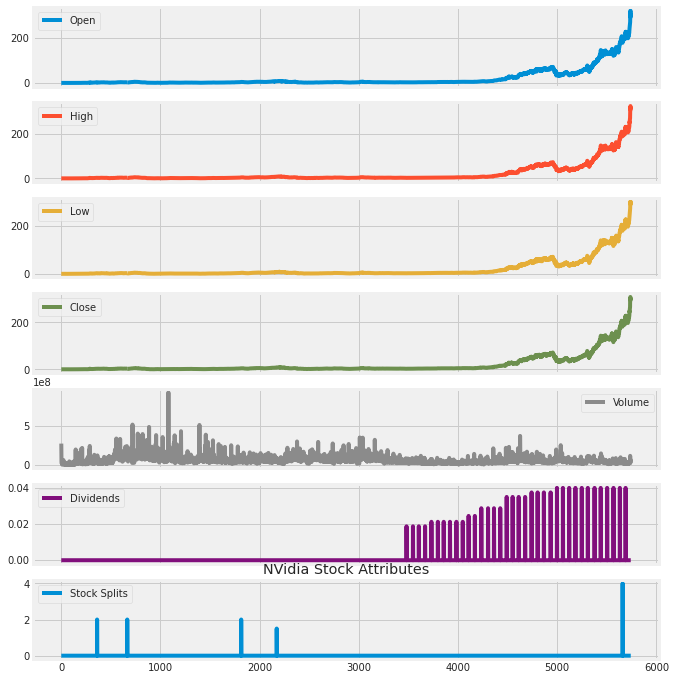

In [5]:
NVDA_Data.plot(subplots = True, figsize = (10,12))
plt.title('NVidia Stock Attributes')
plt.show()

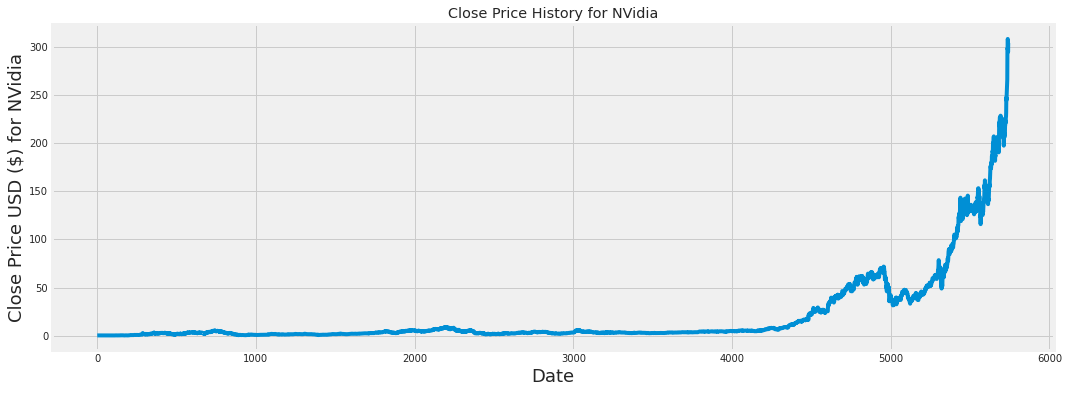

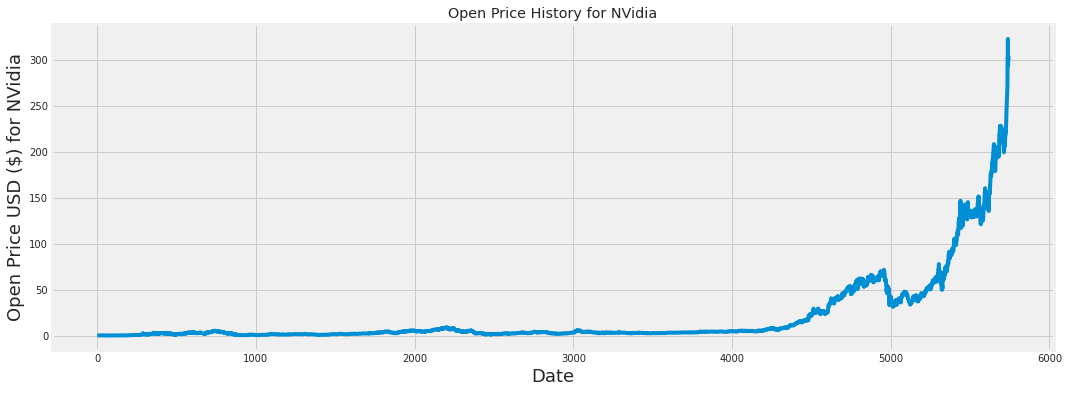

In [6]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(NVDA_Data, 'Close', 'NVidia')
plot_close_val(NVDA_Data, 'Open',  'NVidia')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 4. Basic Company Info </span>

In [7]:

NVDA_info =  pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_info.csv')
NVDA_info.drop(NVDA_info.loc[NVDA_info['Value']=='nan'].index, inplace=True)
NVDA = NVDA_info.sort_values('Value').style
NVDA

<AxesSubplot:>

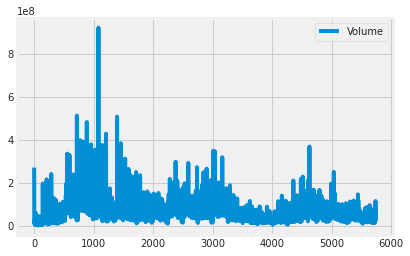

In [8]:
NVDA_Data[["Volume"]].plot()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5. Basic CAGR </span>

In [9]:
NVDA_Data = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv', header=0, index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)
# Get the number of days in `ma`
days = (NVDA_Data.index[-1] - NVDA_Data.index[0]).days

# Calculate the CAGR 
cagr = ((((NVDA_Data['Close'][-1]) / NVDA_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of NVidia since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of NVidia since IPO is  33.49 % per year


## 5.1 Basic Rolling Averages

In [10]:
# Isolate the adjusted closing prices 
adj_close_px = NVDA_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-11-01    220.783500
2021-11-02    221.718251
2021-11-03    222.783001
2021-11-04    224.689001
2021-11-05    226.507501
2021-11-08    228.670501
2021-11-09    230.774251
2021-11-10    232.553751
2021-11-11    234.590751
2021-11-12    236.713251
Name: Close, dtype: float64

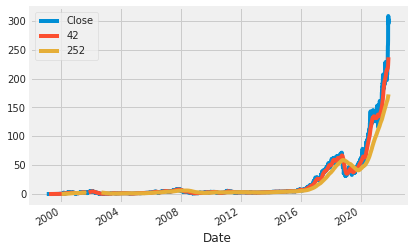

In [11]:
# Short moving window rolling mean
NVDA_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
NVDA_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
NVDA_Data[['Close', '42', '252']].plot()

plt.show()

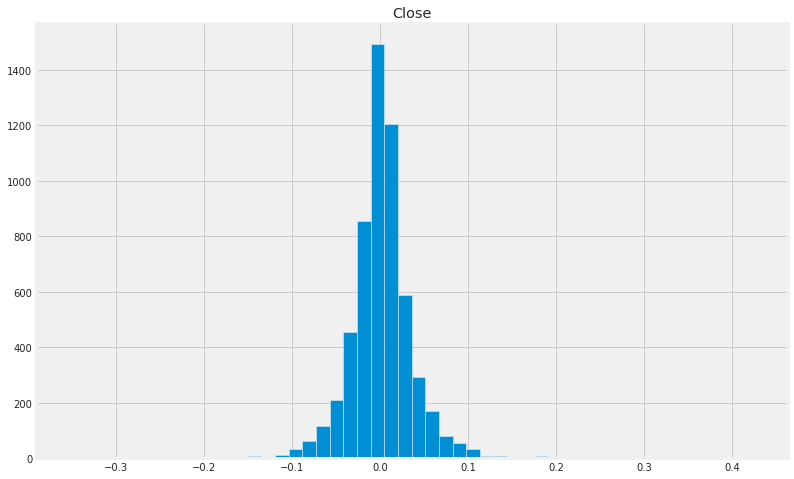

In [12]:
daily_close_px = NVDA_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

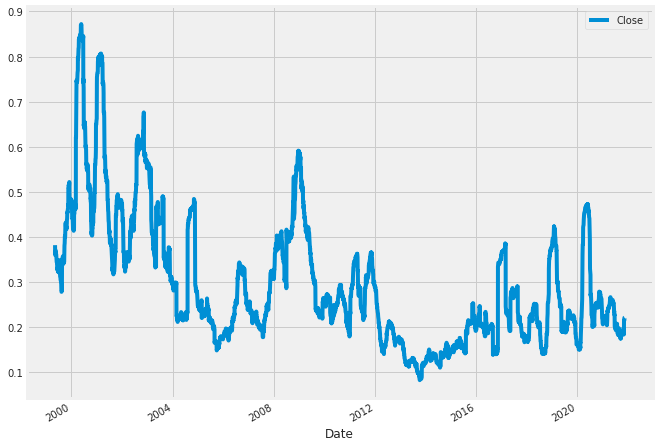

In [13]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

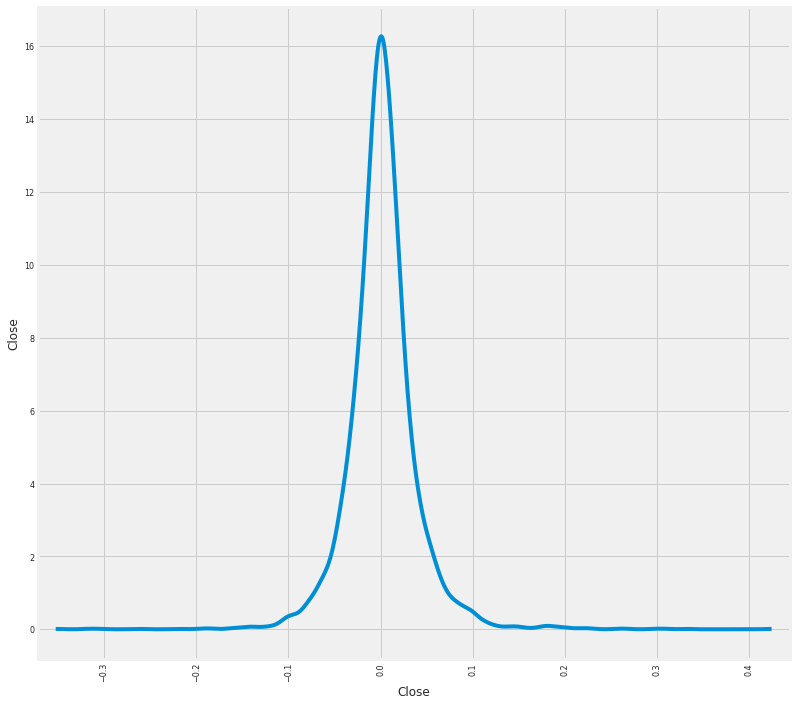

In [14]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5.2 Basic MACD Analysis </span>

In [15]:
import plotly.graph_objects as go

NVDA_Data=NVDA_Data.reset_index()

fig = go.Figure(data=go.Ohlc(x=NVDA_Data['Date'],
        open=NVDA_Data['Open'],
        high=NVDA_Data['High'],
        low=NVDA_Data['Low'],
        close=NVDA_Data['Close']))
fig.show()

In [16]:
NVDA_Data=NVDA_Data.reset_index()

NVDA_Data['SMA5'] = NVDA_Data.Close.rolling(5).mean()
NVDA_Data['SMA20'] = NVDA_Data.Close.rolling(20).mean()
NVDA_Data['SMA50'] = NVDA_Data.Close.rolling(50).mean()
NVDA_Data['SMA200'] = NVDA_Data.Close.rolling(200).mean()
NVDA_Data['SMA500'] = NVDA_Data.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=NVDA_Data['Date'],open=NVDA_Data['Open'],high=NVDA_Data['High'],low=NVDA_Data['Low'],close=NVDA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [17]:
NVDA_Data['EMA5'] = NVDA_Data.Close.ewm(span=5, adjust=False).mean()
NVDA_Data['EMA20'] = NVDA_Data.Close.ewm(span=20, adjust=False).mean()
NVDA_Data['EMA50'] = NVDA_Data.Close.ewm(span=50, adjust=False).mean()
NVDA_Data['EMA200'] = NVDA_Data.Close.ewm(span=200, adjust=False).mean()
NVDA_Data['EMA500'] = NVDA_Data.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=NVDA_Data['Date'],
                              open=NVDA_Data['Open'],
                              high=NVDA_Data['High'],
                              low=NVDA_Data['Low'],
                              close=NVDA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [18]:
NVDA_Data.set_index('Date')

index        Open        High         Low       Close  \
Date                                                                
1999-01-22      0    0.401941    0.448595    0.356484    0.376820   
1999-01-25      1    0.406726    0.421081    0.376820    0.416296   
1999-01-26      2    0.421081    0.429455    0.378016    0.383998   
1999-01-27      3    0.385194    0.394764    0.363661    0.382801   
1999-01-28      4    0.382801    0.385194    0.379212    0.381605   
...           ...         ...         ...         ...         ...   
2021-11-08   5738  301.489990  311.000000  299.070007  308.040009   
2021-11-09   5739  322.820007  323.100006  299.640015  306.570007   
2021-11-10   5740  293.559998  308.500000  287.779999  294.589996   
2021-11-11   5741  304.679993  305.899994  297.769989  303.899994   
2021-11-12   5742  300.100006  306.799988  296.299988  303.899994   

                 Volume  Dividends  Splits          42         252  \
Date                                                                 
1999-01-22  271468800.0        0.0     0.0         NaN         NaN   
1999-01-25   51048000.0        0.0     0.0         NaN         NaN   
1999-01-26   34320000.0        0.0     0.0         NaN         NaN   
1999-01-27   24436800.0        0.0     0.0         NaN         NaN   
1999-01-28   22752000.0        0.0     0.0         NaN         NaN   
...                 ...        ...     ...         ...         ...   
2021-11-08   50310100.0        0.0     0.0  228.670501  169.882228   
2021-11-09   64674600.0        0.0     0.0  230.774251  170.558438   
2021-11-10   63620600.0        0.0     0.0  232.553751  171.221230   
2021-11-11   33217200.0        0.0     0.0  234.590751  171.895279   
2021-11-12   41215100.0        0.0     0.0  236.713251  172.567791   

                  SMA5       SMA20       SMA50      SMA200      SMA500  \
Date                                                                     
1999-01-22         NaN         NaN         NaN         NaN         NaN   
1999-01-25         NaN         NaN         NaN         NaN         NaN   
1999-01-26         NaN         NaN         NaN         NaN         NaN   
1999-01-27         NaN         NaN         NaN         NaN         NaN   
1999-01-28    0.388304         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2021-11-08  286.712006  244.638000  227.847801  179.556764  129.319205   
2021-11-09  295.224005  249.631001  229.442401  180.418356  129.827779   
2021-11-10  300.946002  253.891000  230.857201  181.245903  130.315183   
2021-11-11  302.123999  258.213000  232.447001  182.113342  130.817176   
2021-11-12  303.400000  262.477000  234.045800  182.983842  131.321307   

                  EMA5       EMA20       EMA50      EMA200      EMA500  
Date                                                                    
1999-01-22    0.376820    0.376820    0.376820    0.376820    0.376820  
1999-01-25    0.389979    0.380579    0.378368    0.377212    0.376977  
1999-01-26    0.387985    0.380905    0.378589    0.377280    0.377005  
1999-01-27    0.386257    0.381086    0.378754    0.377335    0.377028  
1999-01-28    0.384707    0.381135    0.378866    0.377377    0.377047  
...                ...         ...         ...         ...         ...  
2021-11-08  289.531442  254.086986  232.184023  188.300171  142.743923  
2021-11-09  295.210964  259.085369  235.101120  189.476986  143.397920  
2021-11-10  295.003975  262.466762  237.434017  190.522886  144.001481  
2021-11-11  297.969314  266.412784  240.040526  191.651017  144.639798  
2021-11-12  299.946208  269.982995  242.544819  192.767922  145.275568  

[5743 rows x 20 columns]

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 6. ARIMA analysis </span>

In [19]:
NVDA_Data = NVDA_Data.set_index('Date')
NVDA_Data.index
x = NVDA_Data['Open'].resample('MS').mean()
x.head()

Date
1999-01-01    0.396558
1999-02-01    0.390860
1999-03-01    0.401057
1999-04-01    0.369813
1999-05-01    0.344521
Freq: MS, Name: Open, dtype: float64

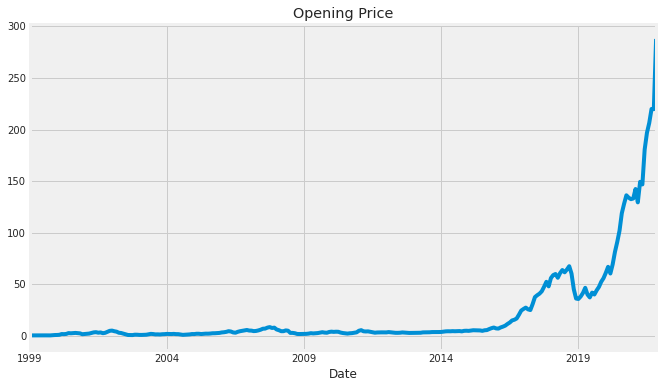

In [20]:
#visualize time series of open price
x.plot(figsize = (10,6))
plt.title("Opening Price")
plt.show()

In [21]:
from pylab import rcParams
import statsmodels.api as sm


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

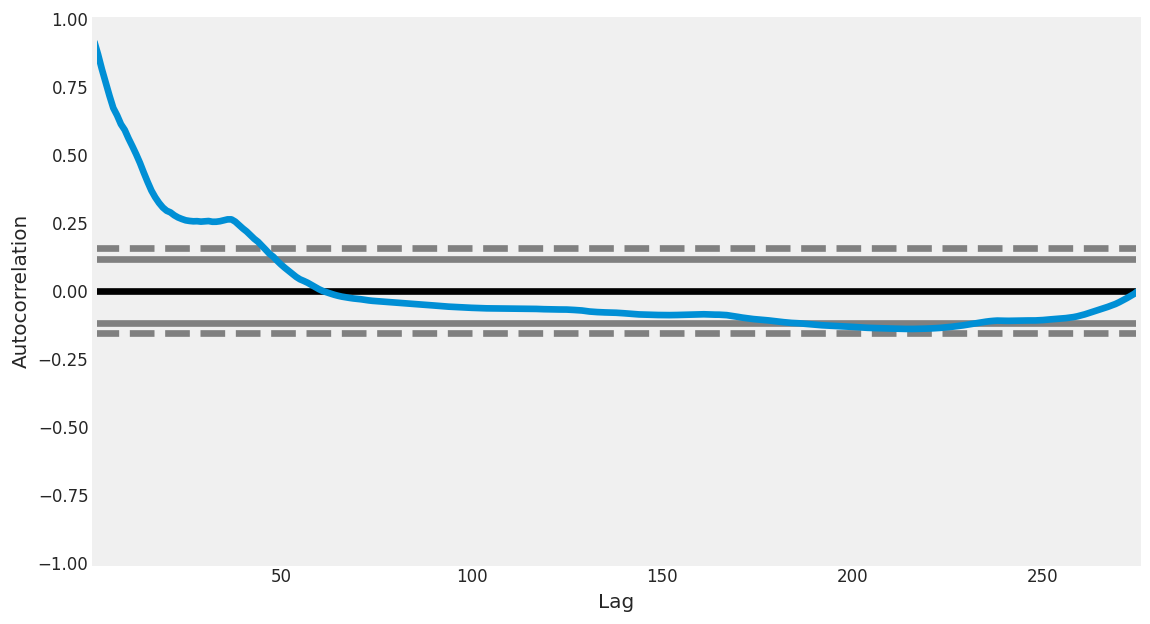

In [22]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [23]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
#selection of parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24941D+00    |proj g|=  7.75407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   5.915D-08   5.249D+00
  F =   5.2494086169606016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2889.174739328331
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.06521D+00    |proj g|=  6.10719D-03

At iterate   35    f=  5.05619D+00    |proj g|=  3.48677D-02

At iterate   40    f=  5.05081D+00    |proj g|=  4.99128D-02

At iterate   45    f=  5.04791D+00    |proj g|=  7.17312D-02

At iterate   50    f=  5.04576D+00    |proj g|=  1.62998D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     50     63      1     0     0   1.630D-02   5.046D+00
  F =   5.0457596504187228     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2779.1678077302977
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.07786D+00    |proj g|=  1.19556D-01

At iterate   10    f=  4.04302D+00    |proj g|=  3.45564D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   3.619D-06   4.043D+00
  F =   4.0430151475121576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2227.6583311316867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04185D+00    |proj g|=  1.29194D-05

           * 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06462D+00    |proj g|=  1.80774D-01

At iterate    5    f=  3.95474D+00    |proj g|=  1.14306D-01

At iterate   10    f=  3.92576D+00    |proj g|=  3.02035D-01

At iterate   15    f=  3.91194D+00    |proj g|=  1.73191D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   3.483D-06   3.912D+00
  F =   3.9119430638942885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0,

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2253.213965914511
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09616D+00    |proj g|=  1.64767D-01

At iterate    5    f=  4.06544D+00    |proj g|=  7.71703D-02

At iterate   10    f=  4.04904D+00    |proj g|=  6.27881D-03

At iterate   15    f=  4.04505D+00    |proj g|=  6.39953D-02

At iterate   20    f=  4.04301D+00    |proj g|=  1.26175D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     30      1     0     0   1.262D-

 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.



At iterate    5    f=  6.03001D+00    |proj g|=  2.83543D-02

At iterate   10    f=  6.02380D+00    |proj g|=  7.60220D-02

At iterate   15    f=  5.61921D+00    |proj g|=  1.95667D-01

At iterate   20    f=  5.46335D+00    |proj g|=  8.00161D-02

At iterate   25    f=  5.29298D+00    |proj g|=  8.23295D-02

At iterate   30    f=  5.19591D+00    |proj g|=  1.52824D-01

At iterate   35    f=  5.13979D+00    |proj g|=  2.22926D-01

At iterate   40    f=  5.09929D+00    |proj g|=  4.85534D-01

At iterate   45    f=  5.07868D+00    |proj g|=  8.73547D-01

At iterate   50    f=  5.06478D+00    |proj g|=  1.46905D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2791.630578178907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79563D+00    |proj g|=  2.28145D+00

At iterate    5    f=  4.06599D+00    |proj g|=  3.62095D-02

At iterate   10    f=  4.02432D+00    |proj g|=  1.76589D-01

At iterate   15    f=  3.86463D+00    |proj g|=  7.54504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     24      1     0     0   1.549D-06   3.865D+00
  F =   3.8646086897792031     

CONVERGENCE: N

 This problem is unconstrained.



At iterate   45    f=  4.05480D+00    |proj g|=  1.59287D-02

At iterate   50    f=  4.05126D+00    |proj g|=  2.45708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     67      1     0     0   2.457D-01   4.051D+00
  F =   4.0512600729698303     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2234.1930401334066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43713D+00    |proj g|=  3.38130D-01

At iterate   

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.



At iterate   15    f=  4.32971D+00    |proj g|=  1.02587D+00

At iterate   20    f=  4.23779D+00    |proj g|=  1.85107D-01

At iterate   25    f=  4.07942D+00    |proj g|=  7.43425D-02

At iterate   30    f=  3.99832D+00    |proj g|=  7.80080D-02

At iterate   35    f=  3.95677D+00    |proj g|=  1.00214D-01

At iterate   40    f=  3.93654D+00    |proj g|=  9.76535D-02

At iterate   45    f=  3.91797D+00    |proj g|=  1.51597D-01

At iterate   50    f=  3.91392D+00    |proj g|=  2.70384D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     75      1     0     0   2.704D-01   3.914D+00
  F =   3.91391894793

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2160.655421364151
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42047D+00    |proj g|=  1.74075D+00

At iterate    5    f=  3.87999D+00    |proj g|=  4.78973D-02

At iterate   10    f=  3.71289D+00    |proj g|=  3.53221D-01

At iterate   15    f=  3.61341D+00    |proj g|=  2.55496D-02

At iterate   20    f=  3.61287D+00    |proj g|=  5.12417D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   5.124D-

 This problem is unconstrained.



At iterate    5    f=  3.84635D+00    |proj g|=  2.87116D-02

At iterate   10    f=  3.58951D+00    |proj g|=  1.31933D-01

At iterate   15    f=  3.47737D+00    |proj g|=  3.63706D-02

At iterate   20    f=  3.47668D+00    |proj g|=  7.40537D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   7.405D-06   3.477D+00
  F =   3.4766785246469136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1920.1731885558024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1727.5072932079906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04091D+00    |proj g|=  1.28581D-01

At iterate    5    f=  3.01197D+00    |proj g|=  1.36486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   5.938D-06   3.012D+00
  F =   3.0119728376920767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1660.5850607306422
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1656.417610419015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87940D+00    |proj g|=  1.71632D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   1.716D-06   2.879D+00
  F =   2.8794044026367236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1587.672421450198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   4.025D-06   2.839D+00
  F =   2.8386799072570996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1567.2739489914047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12435D+00    |proj g|=  1.21998D-01

At iterate    5    f=  3.11686D+00    |proj g|=  2.77306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1653.707416071632
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02990D+00    |proj g|=  2.02222D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   1.291D-06   3.030D+00
  F =   3.0295786431791973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1670.2682537485584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   7.313D-06   2.870D+00
  F =   2.8701123255195888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1584.561779035774
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01196D+00    |proj g|=  5.17709D-02

At iterate    5    f=  3.01000D+00    |proj g|=  7.67308D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.98981D+00    |proj g|=  2.12019D-02

At iterate   10    f=  2.98831D+00    |proj g|=  3.44465D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.238D-06   2.988D+00
  F =   2.9883136198897309     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1651.572490939352
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87804D+00    |proj g|=  1.37714D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1587.7555474723088
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84883D+00    |proj g|=  4.91582D-02

At iterate    5    f=  2.82523D+00    |proj g|=  2.94296D-02

At iterate   10    f=  2.82402D+00    |proj g|=  3.12625D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   4.967D-06   2.824D+00
  F =   2.8240200964039825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.92280D+00    |proj g|=  4.02258D-01

At iterate   10    f=  2.92195D+00    |proj g|=  1.94760D-01

At iterate   15    f=  2.89387D+00    |proj g|=  9.68580D-01

At iterate   20    f=  2.86131D+00    |proj g|=  5.55648D-02

At iterate   25    f=  2.85700D+00    |proj g|=  5.51318D-02

At iterate   30    f=  2.85585D+00    |proj g|=  3.43911D-02

At iterate   35    f=  2.85574D+00    |proj g|=  1.08374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     48      1     0     0   3.817D-04   2.856D+00
  F =   2.8557359545679479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.78663D+00    |proj g|=  1.15965D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.191D-04   2.786D+00
  F =   2.7858554823726611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1538.2205153049636
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35236D+00    |proj g|=  1.33120D+00

At iterate    5    f=  2.93658D+00    |proj g|=  7.90743D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.85345D+00    |proj g|=  1.18144D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   6.641D-06   2.853D+00
  F =   2.8531566464826650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1575.2361555654657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54716D+00    |proj g|=  1.69264D+00

At iterate    5    f=  2.94636D+00    |proj g|=  1.32286D+00

At iterate   

 This problem is unconstrained.



At iterate   10    f=  2.79697D+00    |proj g|=  4.64103D-01

At iterate   15    f=  2.78196D+00    |proj g|=  5.98777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     26      1     0     0   1.007D-05   2.782D+00
  F =   2.7819596902025618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1536.077829611409
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57655D+00    |proj g|=  1.52546D+00


 This problem is unconstrained.



At iterate    5    f=  2.82339D+00    |proj g|=  6.90576D-01

At iterate   10    f=  2.79603D+00    |proj g|=  1.41146D-01

At iterate   15    f=  2.77789D+00    |proj g|=  9.33667D-02

At iterate   20    f=  2.77648D+00    |proj g|=  2.36708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   2.379D-06   2.776D+00
  F =   2.7764848935323441     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1535.0666914427893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.86620D+00    |proj g|=  9.40576D-01

At iterate   10    f=  2.85084D+00    |proj g|=  6.64928D-02

At iterate   15    f=  2.84290D+00    |proj g|=  1.20608D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   7.085D-05   2.843D+00
  F =   2.8428986188229111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1571.594240352601
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30741D+00    |proj g|=  1.17699D+00

At iterate    5    f=  2.80812D+00    |proj g|=  7.09247D-01

At iterate   10    f=  2.78777D+00    |proj g|=  1.57579D-01

At iterate   15    f=  2.77240D+00    |proj g|=  4.62907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   2.015D-04   2.772D+00
  F =   2.7723982521828070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1,

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.86819D+00    |proj g|=  1.54696D-01

At iterate   15    f=  2.84986D+00    |proj g|=  1.58811D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   4.668D-05   2.850D+00
  F =   2.8497768544746918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1575.3772699610804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57343D+00    |proj g|=  1.92653D+00

At iterate   

 This problem is unconstrained.



At iterate   10    f=  2.80119D+00    |proj g|=  3.94224D-02

At iterate   15    f=  2.78165D+00    |proj g|=  1.83813D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   1.613D-05   2.782D+00
  F =   2.7816479665723275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1537.90638161478
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56212D+00    |proj g|=  1.52443D+00


 This problem is unconstrained.



At iterate    5    f=  2.83593D+00    |proj g|=  7.11494D-01

At iterate   10    f=  2.79667D+00    |proj g|=  4.51005D-01

At iterate   15    f=  2.77381D+00    |proj g|=  3.95776D-01

At iterate   20    f=  2.76792D+00    |proj g|=  2.66440D-01

At iterate   25    f=  2.76369D+00    |proj g|=  8.80610D-02

At iterate   30    f=  2.76345D+00    |proj g|=  4.76848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   5.500D-06   2.763D+00
  F =   2.7634538920368956     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1529.899640620

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.87826D+00    |proj g|=  3.27238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   7.247D-06   2.878D+00
  F =   2.8782351910060044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1589.0293550533024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00255D+00    |proj g|=  6.41697D-02

At iterate    5    f=  2.99518D+00    |proj g|=  9.71832D-06

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.99483D+00    |proj g|=  1.27741D-02

At iterate   10    f=  2.99413D+00    |proj g|=  3.19504D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   3.195D-06   2.994D+00
  F =   2.9941347497251569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1654.7741123488363
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86740D+00    |proj g|=  4.26084D-02

At iterate   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85788D+00    |proj g|=  4.87373D-02

At iterate    5    f=  2.83215D+00    |proj g|=  1.98074D-02

At iterate   10    f=  2.83100D+00    |proj g|=  8.09292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   1.387D-06   2.831D+00
  F =   2.8310006822885572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1565.0503752587065
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1634.3584213546014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97168D+00    |proj g|=  4.19457D-01

At iterate    5    f=  2.85337D+00    |proj g|=  3.42310D-02

At iterate   10    f=  2.84805D+00    |proj g|=  1.74309D-01

At iterate   15    f=  2.84185D+00    |proj g|=  3.52843D-02

At iterate   20    f=  2.84150D+00    |proj g|=  1.40193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     31      1     0     0   2.117D

 This problem is unconstrained.



At iterate   15    f=  3.01789D+00    |proj g|=  1.07589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     42      1     0     0   3.003D-05   3.018D+00
  F =   3.0178841653388906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1665.8362909363898
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88353D+00    |proj g|=  7.56558D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.87066D+00    |proj g|=  1.50922D-02
  ys=-5.250E-03  -gs= 8.395E-03 BFGS update SKIPPED

At iterate   10    f=  2.81131D+00    |proj g|=  3.10975D-01

At iterate   15    f=  2.78054D+00    |proj g|=  2.29134D-02

At iterate   20    f=  2.77635D+00    |proj g|=  2.38885D-02

At iterate   25    f=  2.77631D+00    |proj g|=  7.01885D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     50      1     1     0   7.019D-05   2.776D+00
  F =   2.7763098251615430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1534.9704038388486
RUNNI

 This problem is unconstrained.



At iterate   10    f=  2.84729D+00    |proj g|=  4.32056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     23      1     0     0   4.944D-05   2.847D+00
  F =   2.8472252771801361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1573.9739024490748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98880D+00    |proj g|=  1.83691D-01


 This problem is unconstrained.



At iterate    5    f=  2.86880D+00    |proj g|=  1.04467D-01

At iterate   10    f=  2.85141D+00    |proj g|=  1.05258D-01

At iterate   15    f=  2.82787D+00    |proj g|=  2.01128D-01

At iterate   20    f=  2.82391D+00    |proj g|=  7.56454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     47      1     0     0   2.257D-04   2.824D+00
  F =   2.8239042947660575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1563.1473621213318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86956D+00    |proj g|=  1.15745D-02

At iterate    5    f=  2.84441D+00    |proj g|=  2.58574D-01

At iterate   10    f=  2.78620D+00    |proj g|=  6.72357D-02

At iterate   15    f=  2.78569D+00    |proj g|=  1.52408D-02

At iterate   20    f=  2.78563D+00    |proj g|=  6.66173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     34      1     0     0   6.416D

 This problem is unconstrained.



At iterate    5    f=  2.82567D+00    |proj g|=  3.59170D-02
  ys=-8.826E-03  -gs= 1.727E-02 BFGS update SKIPPED

At iterate   10    f=  2.78251D+00    |proj g|=  5.89402D-02

At iterate   15    f=  2.76693D+00    |proj g|=  4.70438D-02

At iterate   20    f=  2.76484D+00    |proj g|=  3.77249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     1     0   1.470D-06   2.765D+00
  F =   2.7648392868948055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1530.661607792143


In [25]:
#fitting model
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86956D+00    |proj g|=  1.15745D-02

At iterate    5    f=  2.84441D+00    |proj g|=  2.58574D-01


 This problem is unconstrained.



At iterate   10    f=  2.78620D+00    |proj g|=  6.72357D-02

At iterate   15    f=  2.78569D+00    |proj g|=  1.52408D-02

At iterate   20    f=  2.78563D+00    |proj g|=  6.66173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     34      1     0     0   6.416D-05   2.786D+00
  F =   2.7856289668171574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0245      0.019     55.018      0.000       0.988       1.061


# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">6.1 AD Fuller Tests</span>

In [26]:
# ADF Test
result = adfuller(x, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(x, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 4.6442313873130585
p-value: 1.0
Critial Values:
   1%, -3.4554613060274972
Critial Values:
   5%, -2.8725931472675046
Critial Values:
   10%, -2.5726600403359887

KPSS Statistic: 0.916939
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">7 FINTA Tech Analysis Ratios</span>

## Let us do a financial ratios calculation using FINTA library
* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'

In [27]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    !pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover

     |████████████████████████████████| 175 kB 6.6 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173823 sha256=4f0ae23d88a1708d182b7a4684ca05fd455ee1f36fc56e9054b90c494db5c21e
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


Loading BokehJS ...

In [28]:
fin_NVDA = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv', index_col="Date", parse_dates=True)
print(fin_NVDA.head())
ohlc=fin_NVDA
print(TA.SMA(ohlc, 42))

                Open      High       Low     Close       Volume  Dividends  \
Date                                                                         
1999-01-22  0.401941  0.448595  0.356484  0.376820  271468800.0        0.0   
1999-01-25  0.406726  0.421081  0.376820  0.416296   51048000.0        0.0   
1999-01-26  0.421081  0.429455  0.378016  0.383998   34320000.0        0.0   
1999-01-27  0.385194  0.394764  0.363661  0.382801   24436800.0        0.0   
1999-01-28  0.382801  0.385194  0.379212  0.381605   22752000.0        0.0   

            Stock Splits  
Date                      
1999-01-22           0.0  
1999-01-25           0.0  
1999-01-26           0.0  
1999-01-27           0.0  
1999-01-28           0.0  
Date
1999-01-22           NaN
1999-01-25           NaN
1999-01-26           NaN
1999-01-27           NaN
1999-01-28           NaN
                 ...    
2021-11-08    228.407620
2021-11-09    230.355001
2021-11-10    232.094763
2021-11-11    234.034763
2021-11-1

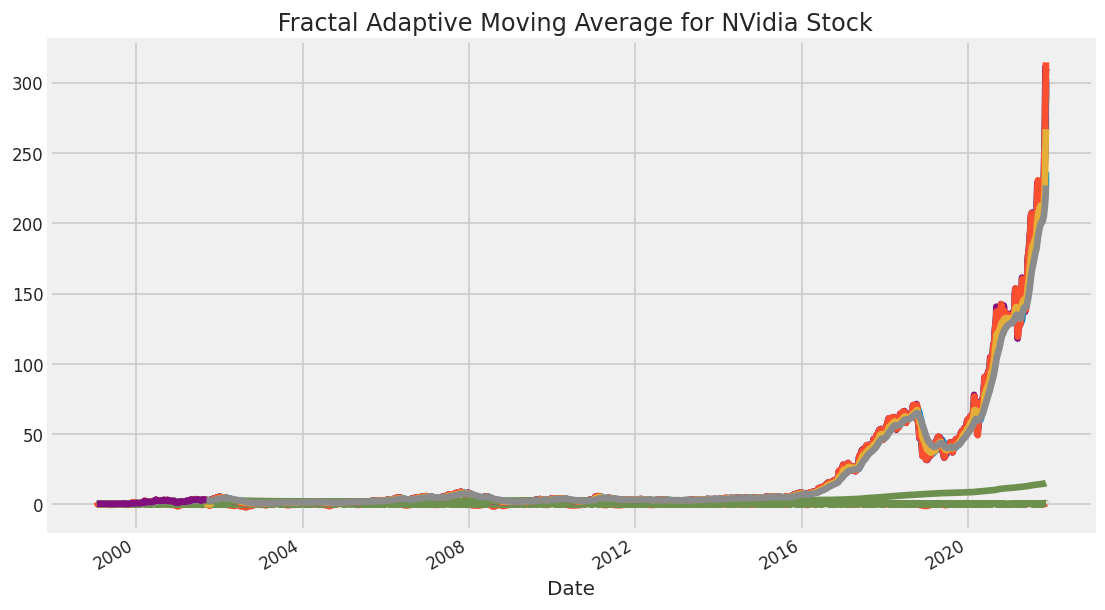

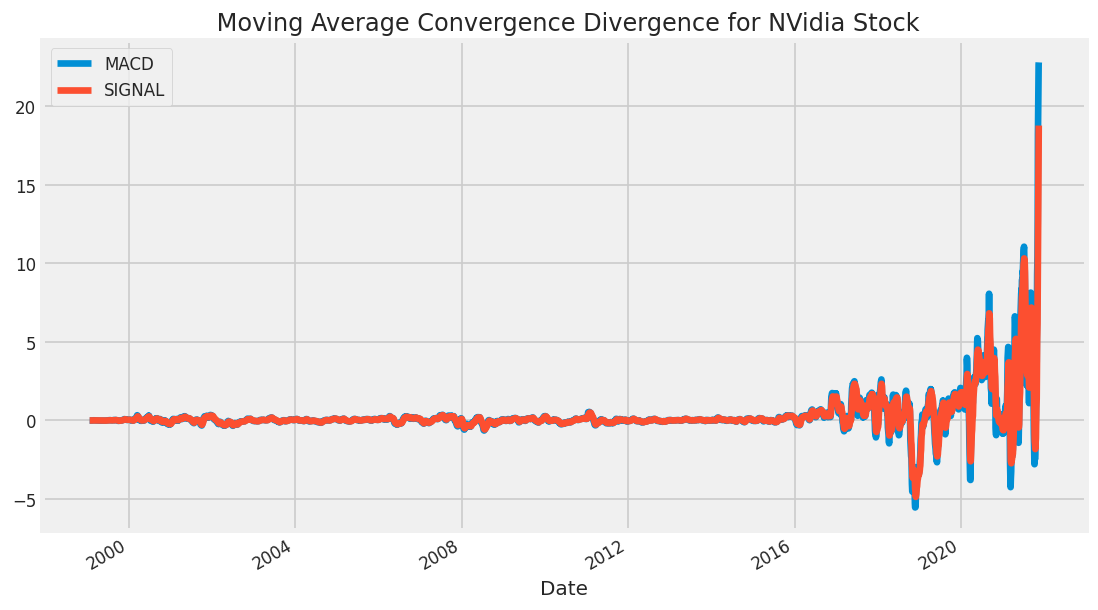

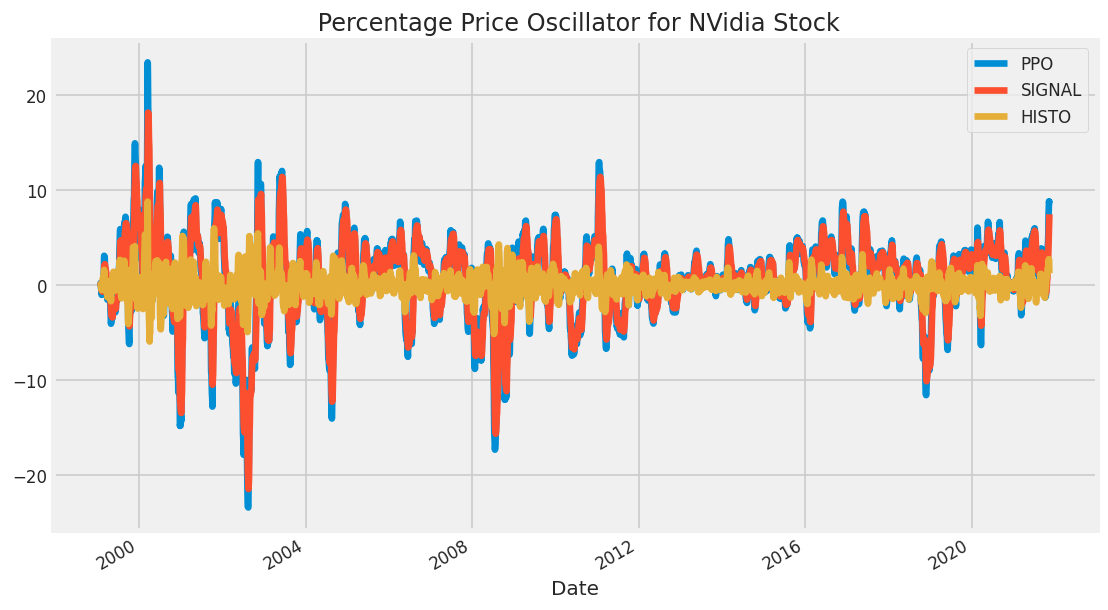

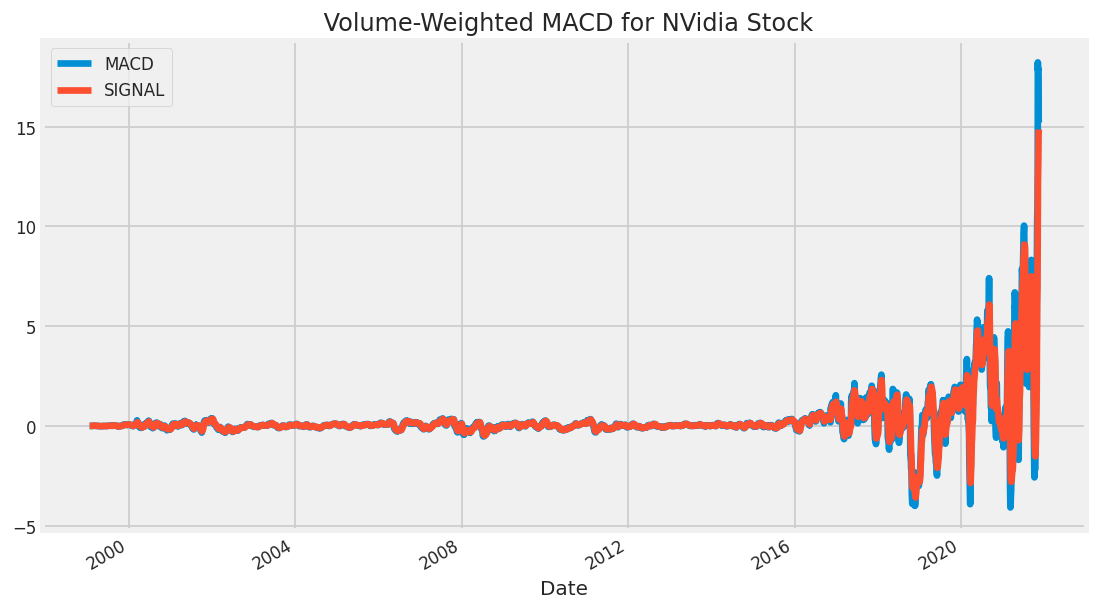

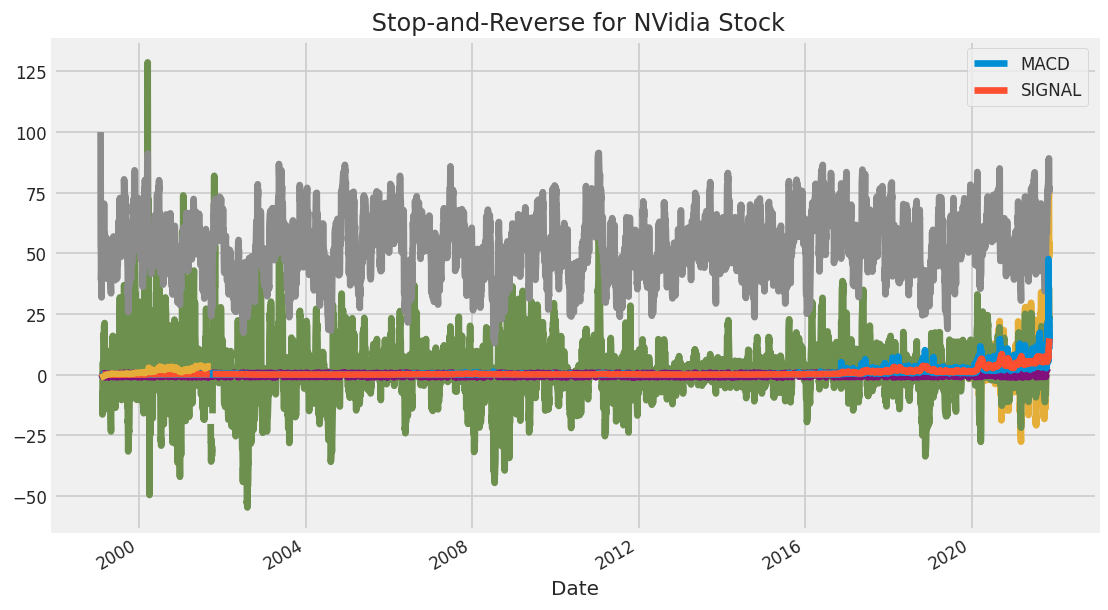

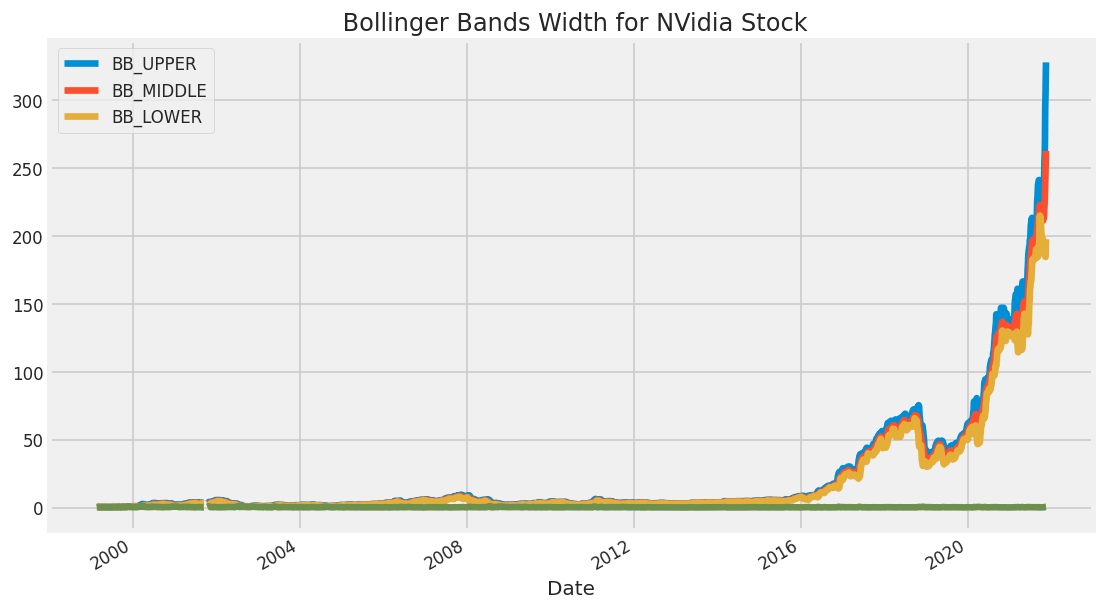

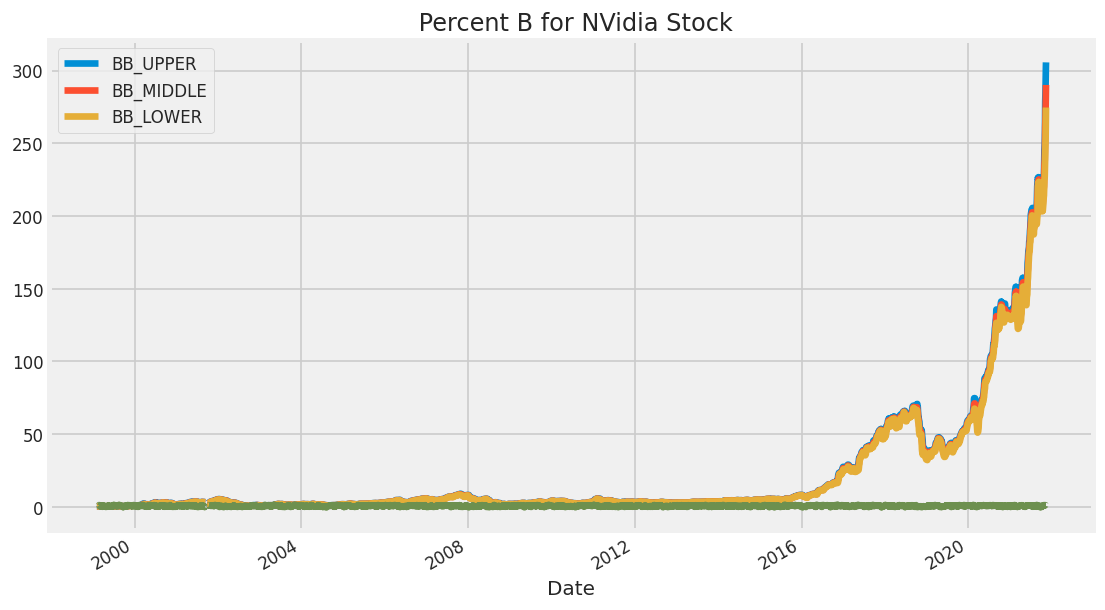

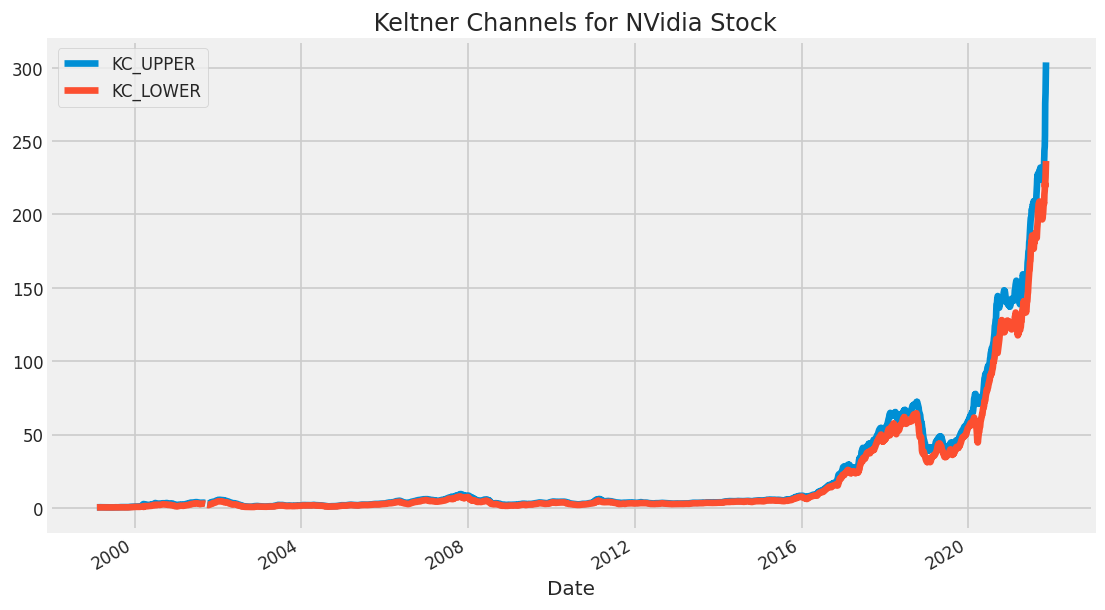

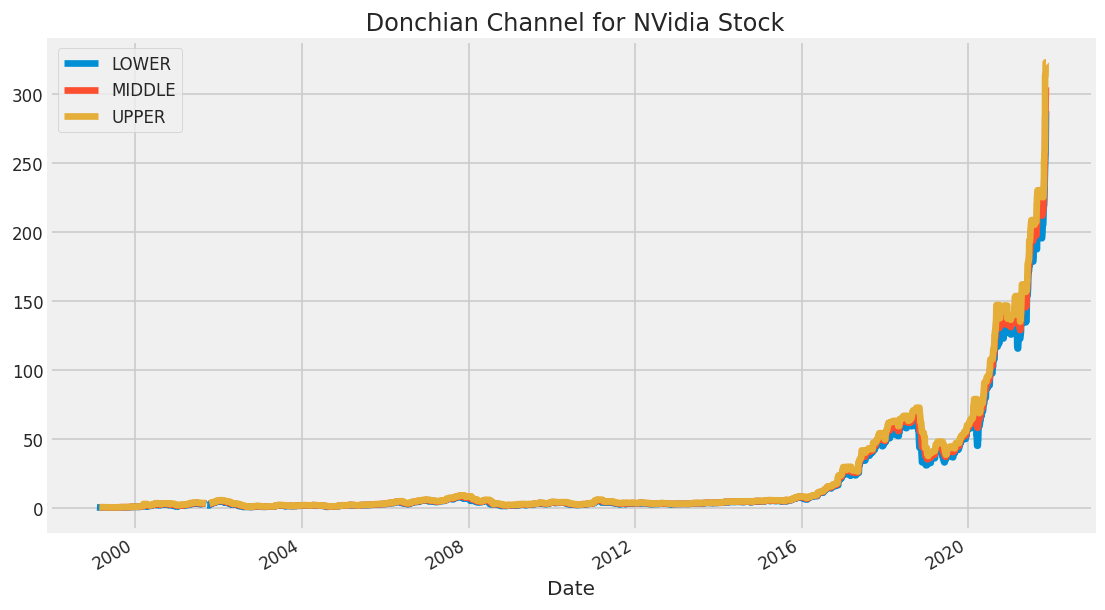

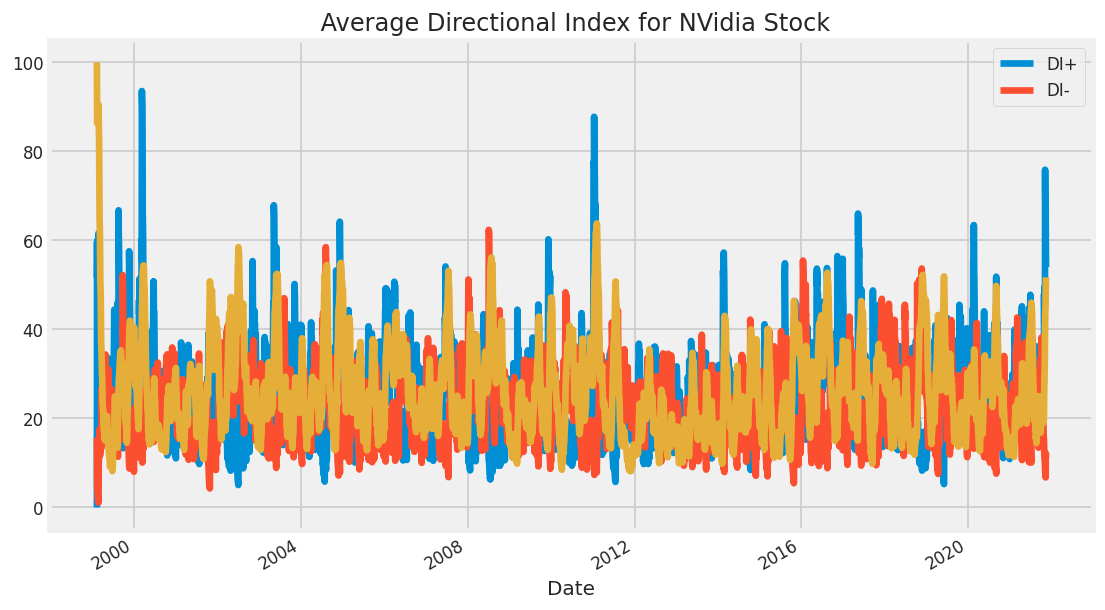

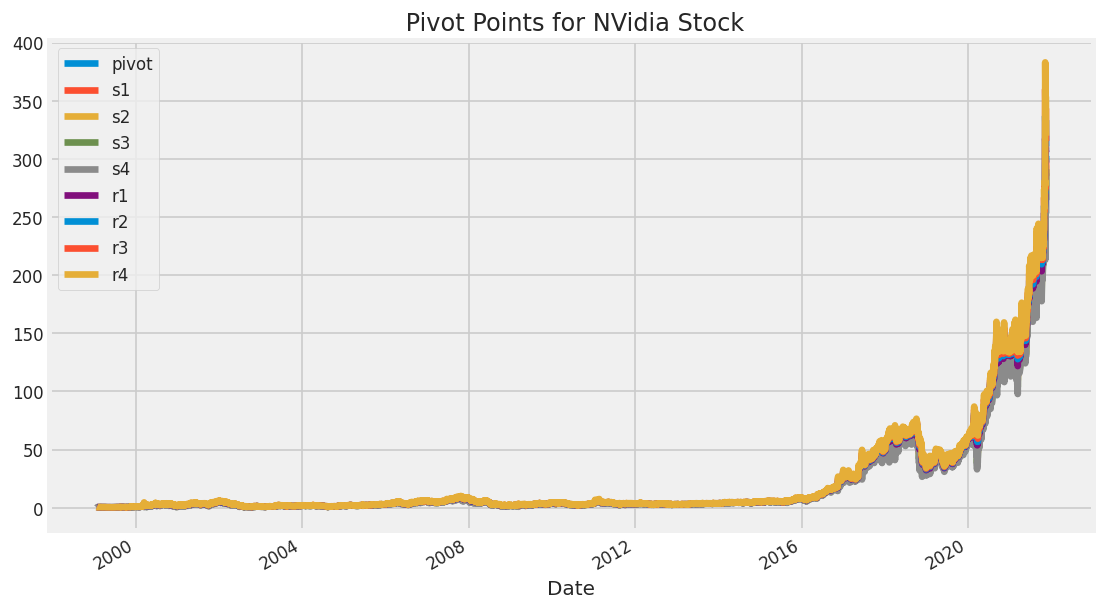

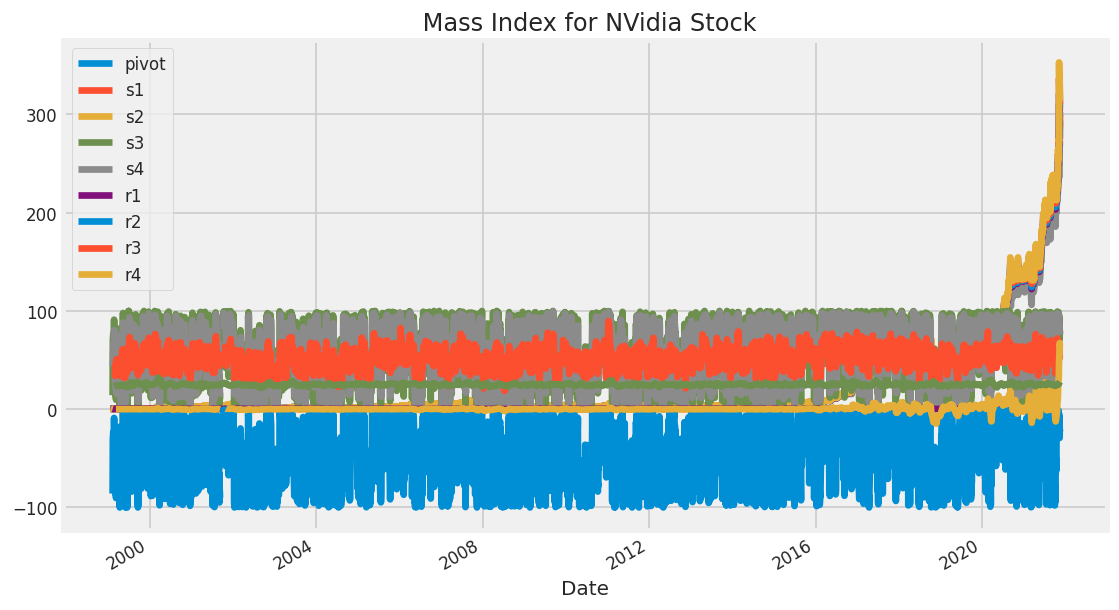

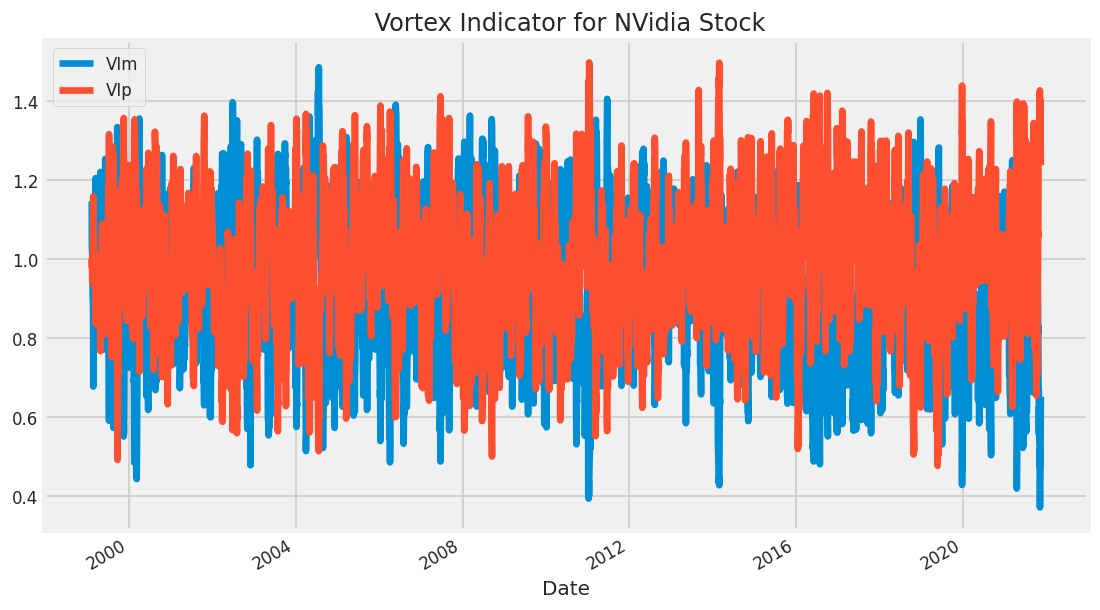

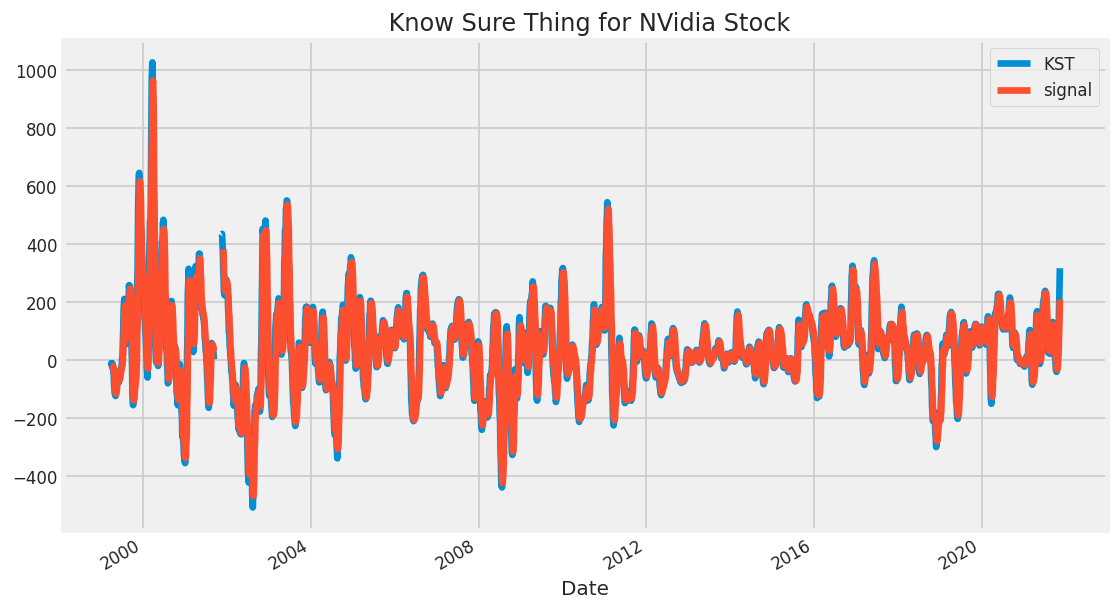

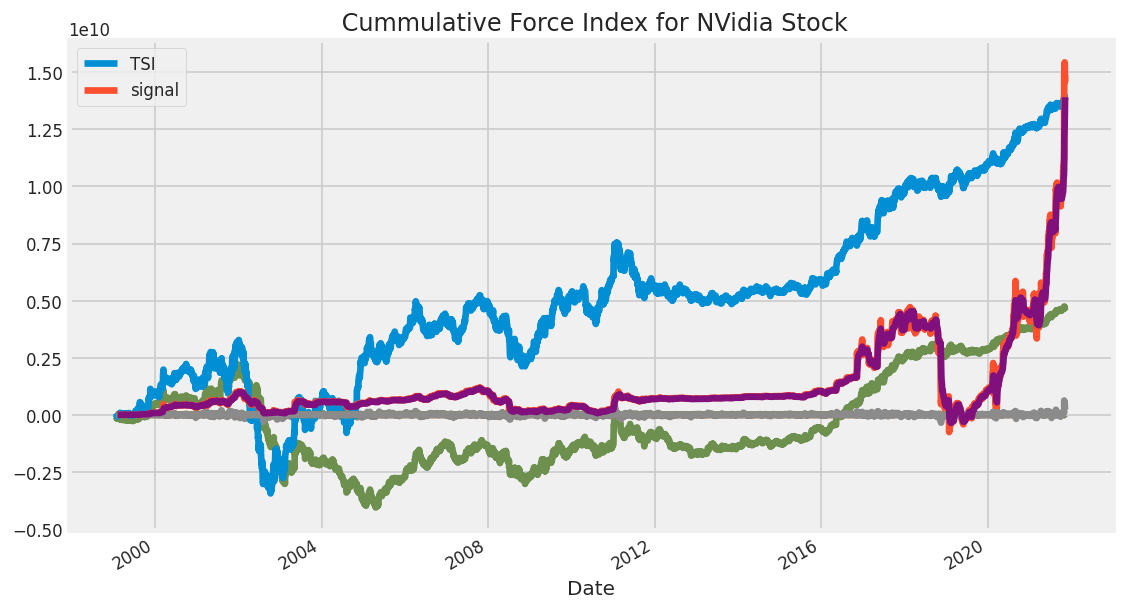

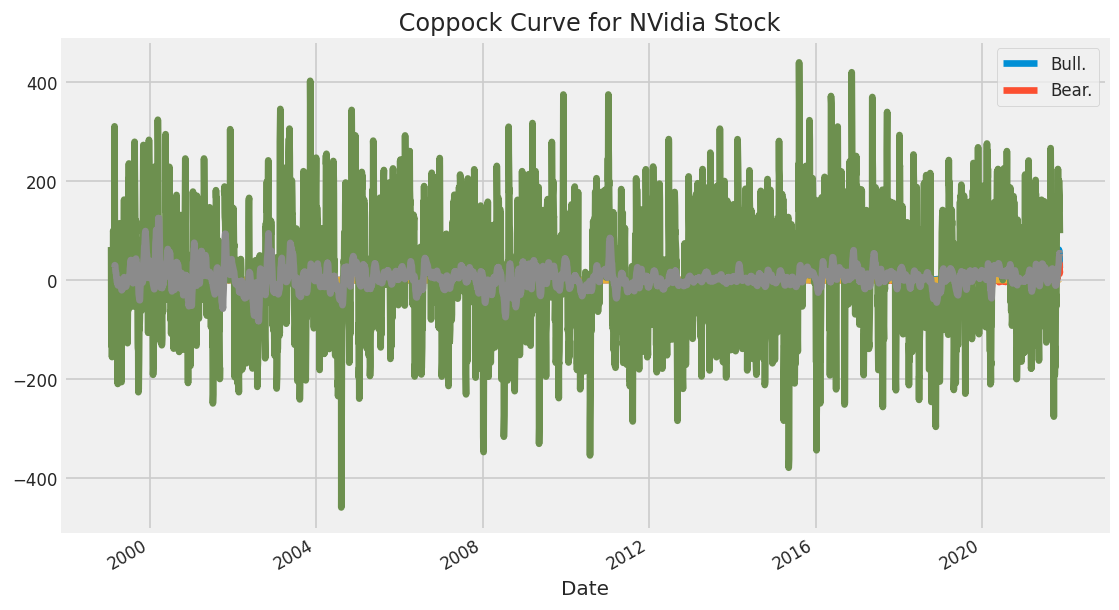

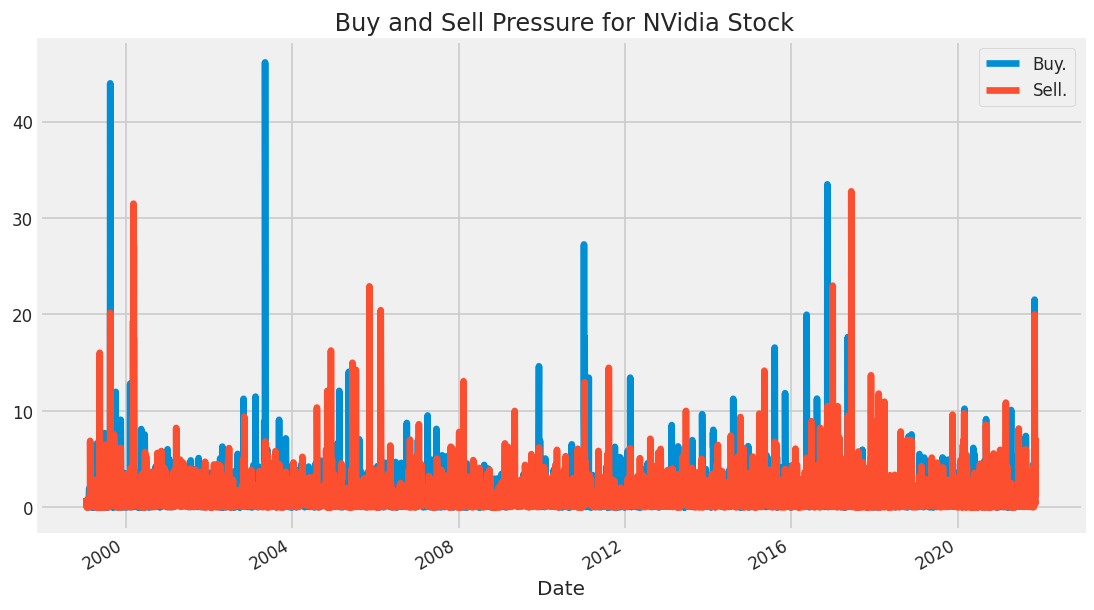

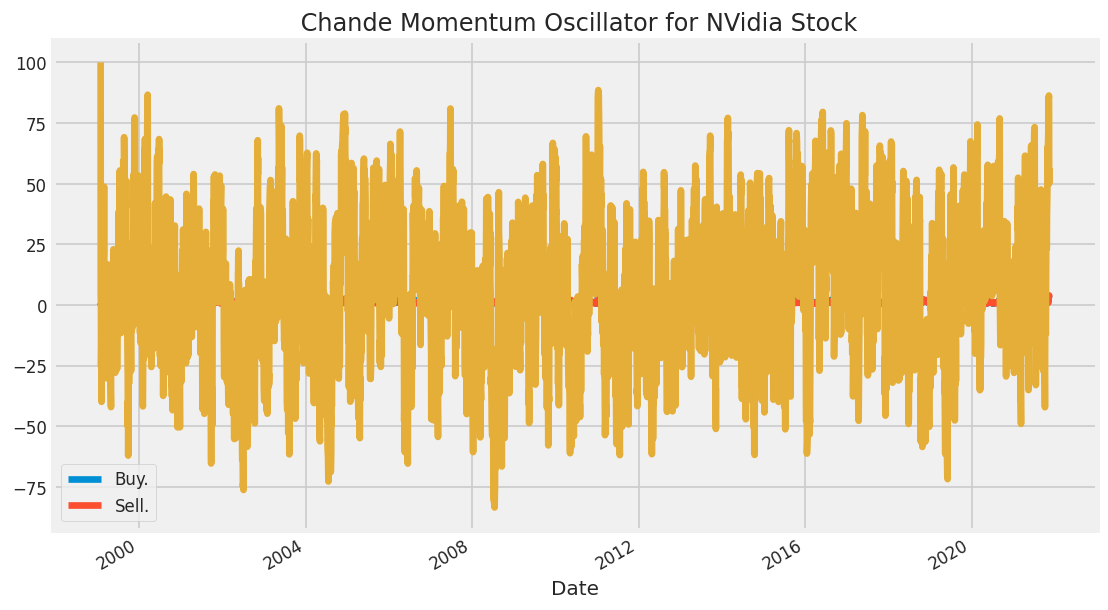

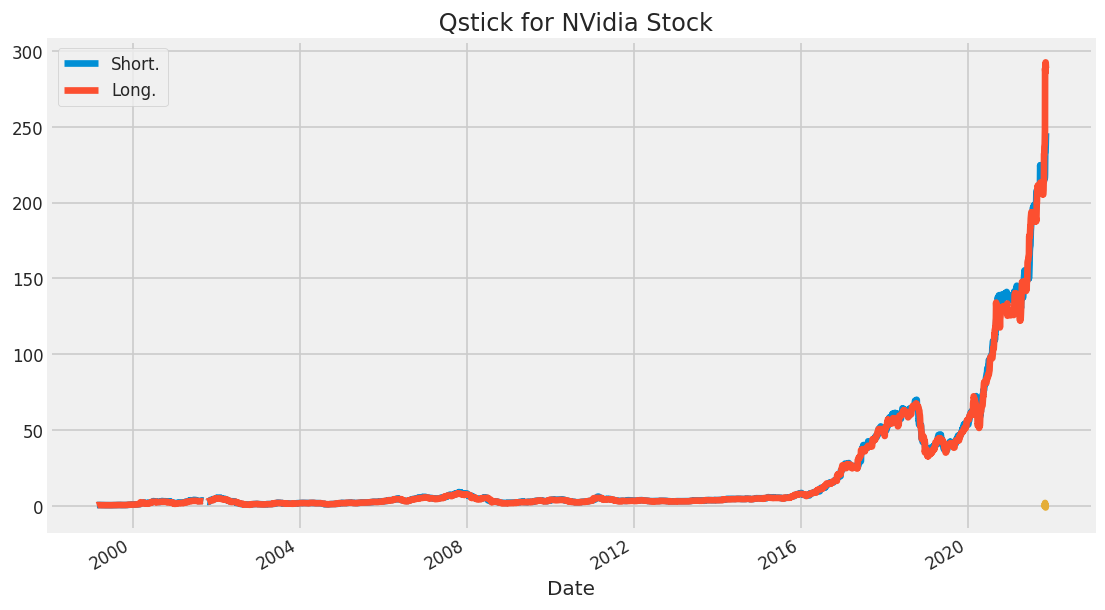

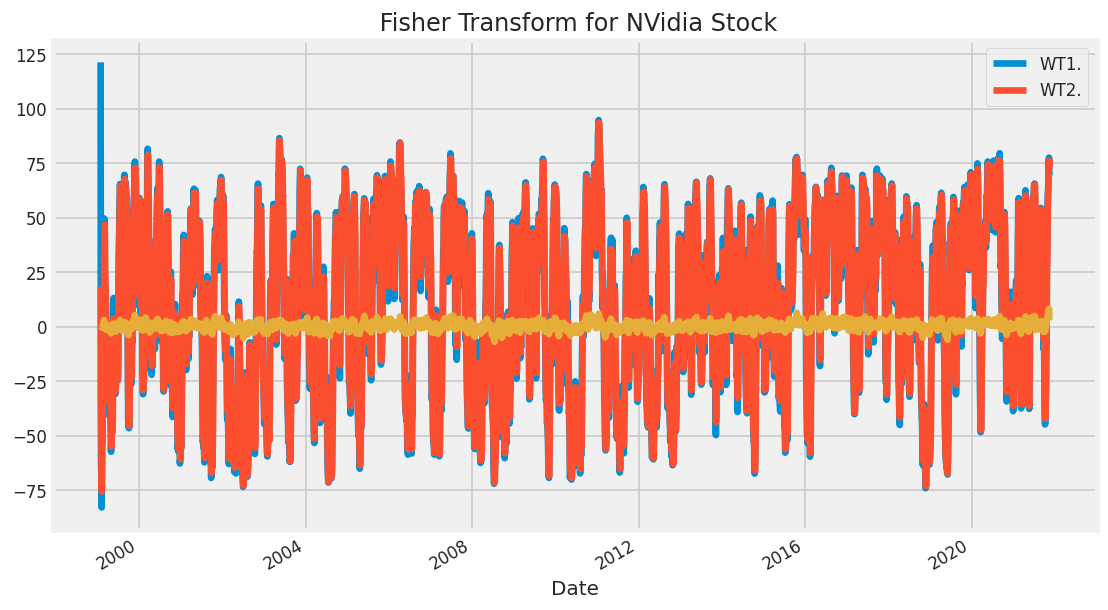

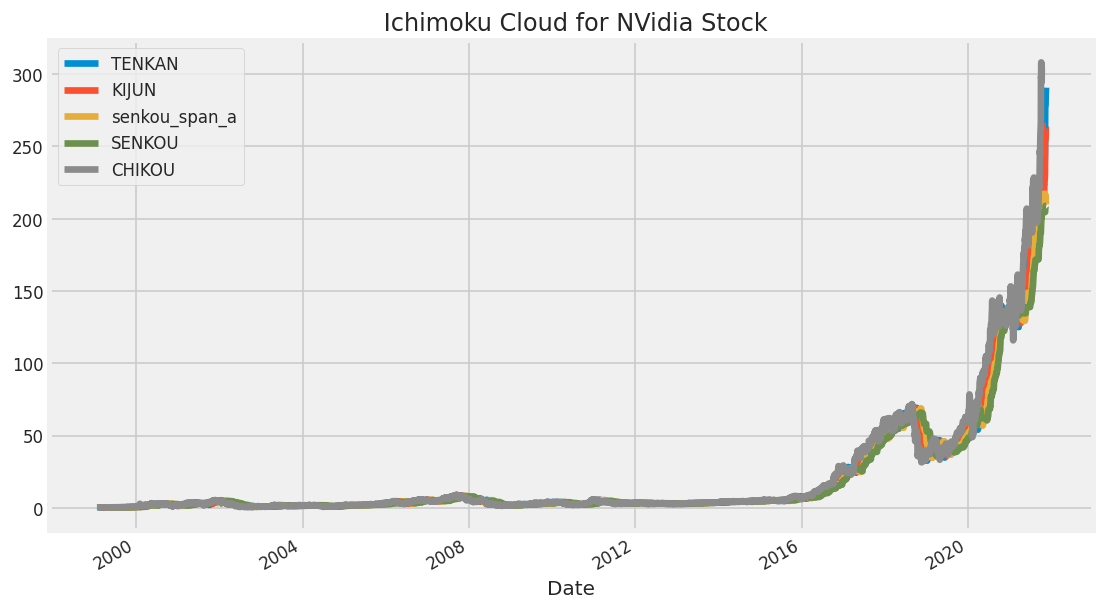

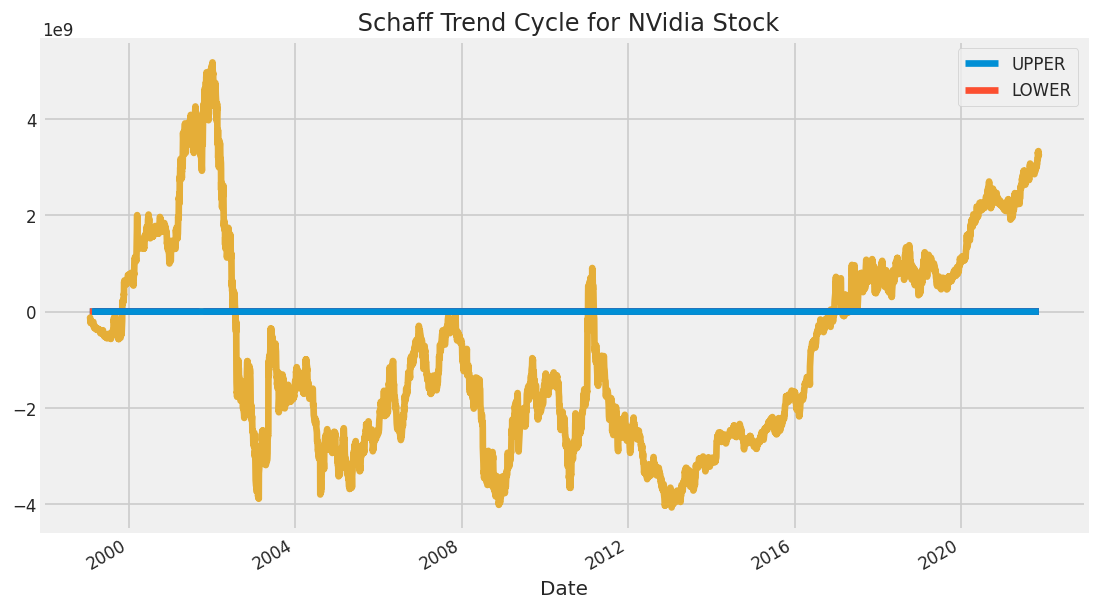

In [29]:
function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 ' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "for NVidia Stock')"
    result = eval(function_name)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 8 Back Testing Trading Strategy</span>

In [30]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

## Let us do a bit of backtesting with a value of $100000 

In [31]:
ohlc=ohlc.dropna()
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.0015, exclusive_orders=True)

## Back Testing Summary

In [32]:
bt.run()

Start                     1999-01-22 00:00:00
End                       2021-11-12 00:00:00
Duration                   8330 days 00:00:00
Exposure Time [%]                   99.947753
Equity Final [$]                   2760.23381
Equity Peak [$]                 111046.638033
Return [%]                         -97.239766
Buy & Hold Return [%]            80548.654497
Return (Ann.) [%]                  -14.576461
Volatility (Ann.) [%]               53.090803
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -98.747026
Avg. Drawdown [%]                  -50.258437
Max. Drawdown Duration     8319 days 00:00:00
Avg. Drawdown Duration     4162 days 00:00:00
# Trades                                  450
Win Rate [%]                        35.333333
Best Trade [%]                      81.558572
Worst Trade [%]                    -41.505041
Avg. Trade [%]                    

### As you can see, if you had invested <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">`$100K` in NVidia</SPAN> shares, you would have got <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Fluctuating </SPAN> returns between 2000 and 2010 <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> and an increasing yield now in </SPAN> returns

## Use Zoom to see the performance of the stock

In [33]:
bt.plot()

Row(id='1450', ...)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.0.5 Back Testing using KNN </span>
## Try another strategy - K Nearest Neighbor

##### Reference from Backtesting Manual

##### Please note this is a simple implementation of the example and is no way close to a professional trading strategy. This is purely for showing an example

In [34]:
import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

In [35]:
data=ohlc

In [36]:
from backtesting.test import SMA

def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
data = data.dropna().astype(np.float64)


Classification accuracy:  0.6182987848463188


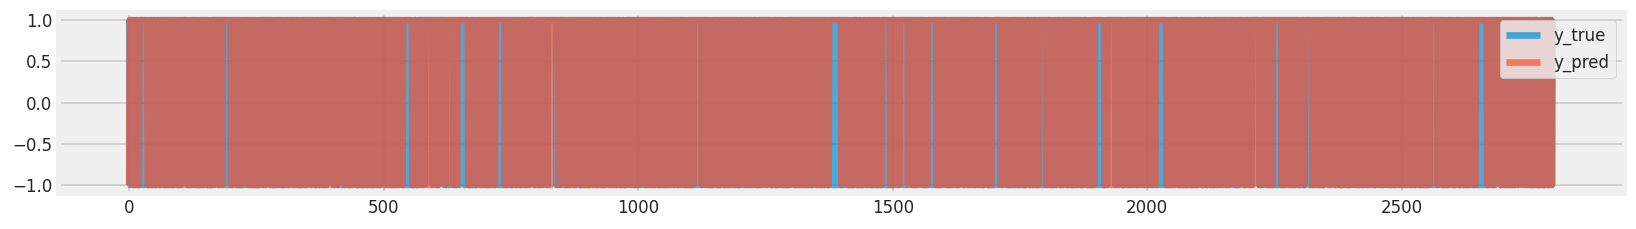

In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [38]:
%%time

from backtesting import Backtest, Strategy

N_TRAIN = 400


class MLTrainOnceStrategy(Strategy):
    price_delta = .004  # 0.4%

    def init(self):        
        # Init our model, a kNN classifier
        self.clf = KNeighborsClassifier(7)

        # Train the classifier in advance on the first N_TRAIN examples
        df = self.data.df.iloc[:N_TRAIN]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Plot y for inspection
        self.I(get_y, self.data.df, name='y_true')

        # Prepare empty, all-NaN forecast indicator
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        # Skip the training, in-sample data
        if len(self.data) < N_TRAIN:
            return

        # Proceed only with out-of-sample data. Prepare some variables
        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        # Forecast the next movement
        X = get_X(self.data.df.iloc[-1:])
        forecast = self.clf.predict(X)[0]

        # Update the plotted "forecast" indicator
        self.forecasts[-1] = forecast

        # If our forecast is upwards and we don't already hold a long position
        # place a long order for 20% of available account equity. Vice versa for short.
        # Also set target take-profit and stop-loss prices to be one price_delta
        # away from the current closing price.
        upper, lower = close[-1] * (1 + np.r_[1, -1]*self.price_delta)

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # Additionally, set aggressive stop-loss on trades that have been open 
        # for more than two days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)


bt = Backtest(data, MLTrainOnceStrategy, commission=.0002, margin=.05)
bt.run()

CPU times: user 9.03 s, sys: 59.6 ms, total: 9.09 s
Wall time: 9.09 s


Start                     1999-06-15 00:00:00
End                       2021-11-12 00:00:00
Duration                   8186 days 00:00:00
Exposure Time [%]                    8.417508
Equity Final [$]                     0.175662
Equity Peak [$]                       10000.0
Return [%]                         -99.998243
Buy & Hold Return [%]            93298.101811
Return (Ann.) [%]                  -38.674502
Volatility (Ann.) [%]               13.027001
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -99.998243
Avg. Drawdown [%]                  -99.998243
Max. Drawdown Duration     7610 days 00:00:00
Avg. Drawdown Duration     7610 days 00:00:00
# Trades                                  475
Win Rate [%]                         1.473684
Best Trade [%]                       0.492895
Worst Trade [%]                     -6.442929
Avg. Trade [%]                    

In [39]:
bt.plot()

Row(id='2275', ...)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.1 Back Testing Trading Strategy Using KNN</span>

In [40]:
from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sNVDA_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sNVDA_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sNVDA_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sNVDA_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sNVDA_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sNVDA_exit)):
                
                self.position.close()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.2 BackTesting Trading Strategy Heatmaps</span>

In [41]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

Backtest.optimize:   0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 757 ms, sys: 63 ms, total: 820 ms
Wall time: 24 s


In [42]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        1.256370e+06
     80   15       10        1.154201e+06
     100  15       10        2.172986e+05
30   40   20       15        1.747011e+04
          25       15        1.616222e+04
                                 ...     
100  200  15       10        7.627618e+04
          20       10        2.356344e+04
                   15        1.213668e+04
          25       10        3.001632e+04
          30       10        2.263674e+04
Name: Equity Final [$], Length: 177, dtype: float64

In [43]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2            40            60            80             100            120  \
n1                                                                            
20            NaN  1.256370e+06  1.154201e+06  217298.550320            NaN   
30   16816.167491  1.749170e+05  3.167925e+05   14501.876714   74425.649799   
40            NaN  2.552782e+04           NaN   28817.104145   19636.666136   
50            NaN  3.116243e+04  1.237391e+05   31793.318022   33410.958273   
60            NaN           NaN  3.254122e+04   14392.568455    3572.156083   
70            NaN           NaN  1.399788e+04   11445.028508   14628.939931   
80            NaN           NaN           NaN   30199.668491    4313.355874   
90            NaN           NaN           NaN   89766.229130   12263.221068   
100           NaN           NaN           NaN            NaN  148599.875668   

n2             140           160            180           200  
n1                                                             
20             NaN           NaN            NaN           NaN  
30   110861.180552  30724.645992  129876.460048  73626.540843  
40     3193.697469  73218.814871  124549.597427  77242.415113  
50    16044.639636  13618.497208   18283.709143  75446.172143  
60    46093.286910  68094.659949  267735.861885  74920.687776  
70        0.000000  73605.401064  158104.816324  60981.516366  
80    43359.018947  83626.917818   85334.648755  62682.421178  
90    24728.804129  67948.139184  124978.049965  62273.073215  
100   77427.152550  35550.510941   48750.910091  32925.869616

In [44]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

Column(id='2936', ...)

In [45]:
%%capture

!pip install scikit-optimize  # This is a run-time dependency

In [46]:
%%time

stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 45.7 s, sys: 203 ms, total: 45.9 s
Wall time: 45.9 s


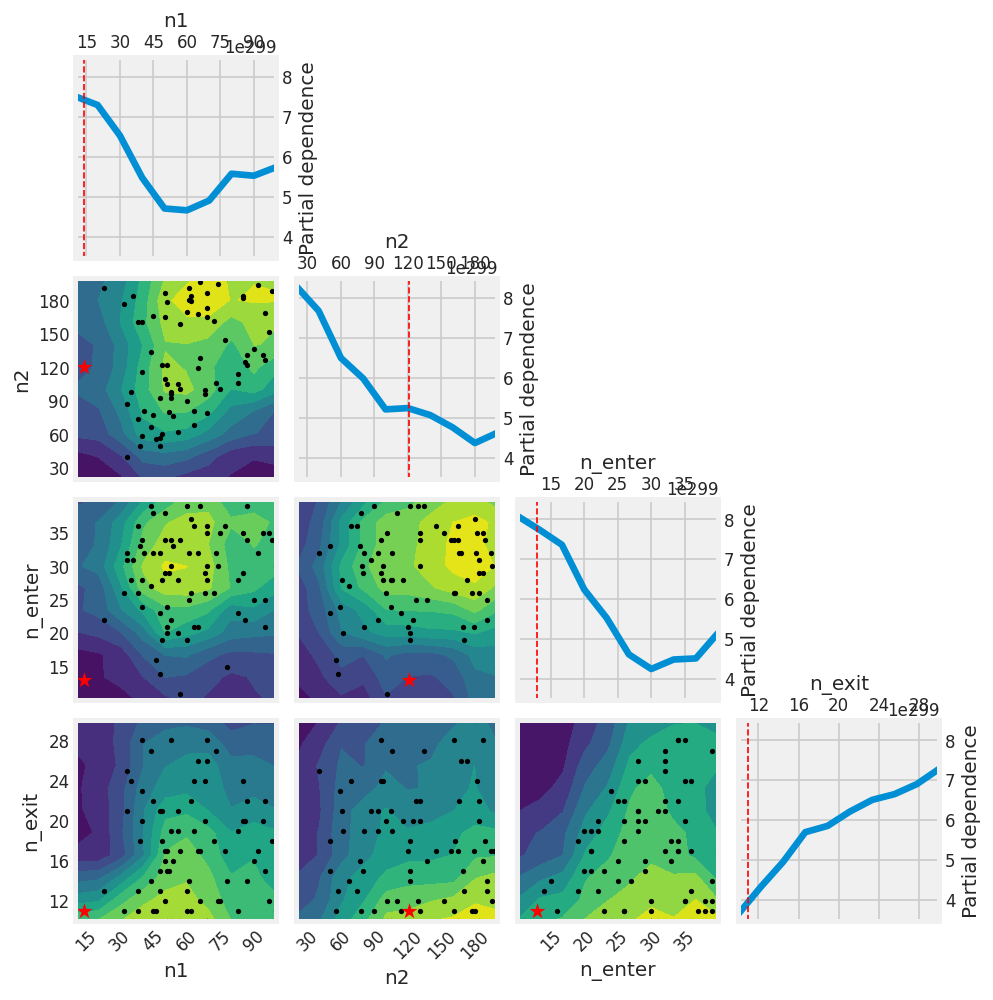

In [47]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

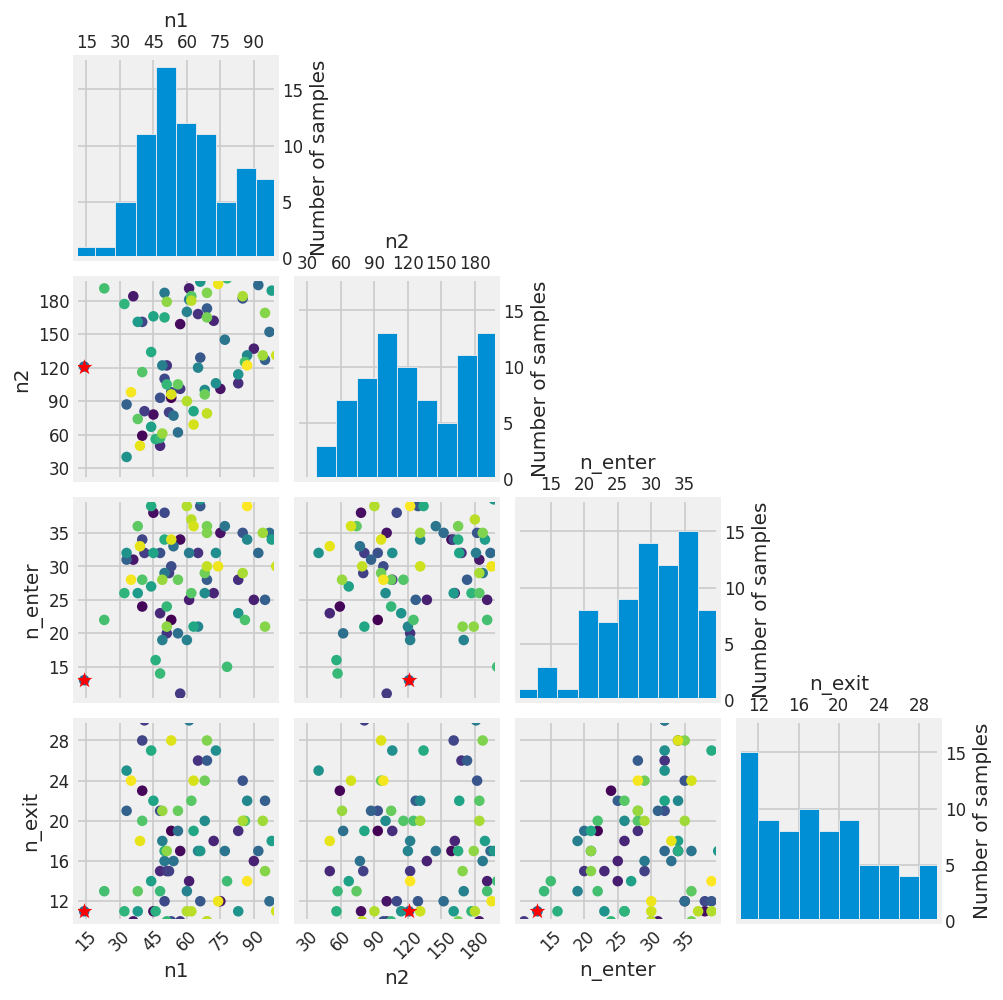

In [48]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Work In Progress. More to come</span>